## Technical programming Exam
## AH Nhleko 22411763
## Theme : Data Driven Crime Analytics In SA


# Dataset and Justification

**Dataset Titles:**  
1. South African Crime Statistics (2005–2016)  
2. General Household Survey (2022)  

**Sources:**  
- kaggle  https://www.kaggle.com/code/misterseitz/south-african-crime-statistics-2005-2016/input  
- kaggle https://www.kaggle.com/datasets/viroshensewpaul/general-household-survey-data-from-2012-to-2022/data

**File Formats:** `.csv`  
- **Primary Dataset:** SouthAfricaCrimeStats_v2.csv  
- **Supporting Multi-Relational Dataset:** ghs-2022-person-v1.csv  

---

## Justification of Dataset Selection

The **South African Crime Statistics dataset** provides annual incident counts across multiple crime categories (e.g., burglary, assault, vehicle theft) for over 1,100 police precincts between **2005–2016**. This dataset forms the foundation for the project’s two core objectives:

1. **Classification of Crime Hotspots:**  
   Enables analysis of spatial and temporal patterns in crime incidents. Precincts or wards can be classified as “hotspots” based on a defined threshold (e.g., top 25% of precincts by total incidents). These classifications directly inform decisions around police patrol allocation, technology deployment, and community safety planning.

2. **Forecasting Crime Trends:**  
   Supports time-series modeling of crime evolution over years and (when extended to monthly resolution) forecasting future crime risks. Forecasting results guide proactive resource planning, such as anticipating burglary spikes during holiday months or adjusting patrol intensity.

The **General Household Survey (GHS)** complements the crime data by adding **contextual socio-economic indicators**—employment status, education level, income, housing type, and household density. This multi-relational structure allows linking socio-economic conditions to crime levels, providing explanatory power for why certain areas become hotspots.

By combining these two datasets, the project integrates both **incident-level** and **contextual** dimensions of crime analytics, enabling robust classification and forecasting models relevant to real-world policy implementation in South Africa.

---

# Dataset Suitability

### **Relevance**
- The **Crime Statistics dataset** is directly aligned with the project theme: *Data-Driven Crime Analytics in South Africa*. It contains official, station-level counts of crime categories, making it suitable for both **classification** (hotspot detection) and **forecasting** (trend prediction).
- The **GHS dataset** provides demographic and socio-economic features that correlate strongly with crime incidence, making it ideal for contextual modeling and for fulfilling the **multi-relational** dataset requirement.

### **Completeness**
- **Temporal coverage:** Crime data spans 11 years (2005–2016) across all provinces, offering strong historical depth for trend analysis.  
- **Geographic coverage:** Includes all major precincts nationwide, representing both urban and rural crime contexts.  
- **Variable diversity:** Crime data includes multiple categories, while GHS data includes demographics, education, employment, and housing indicators—enabling comprehensive feature engineering.  
- Together, the datasets enable both predictive and explanatory modeling, showcasing full data science workflow from cleaning to visualization.

### **Credibility**
- Both datasets are sourced from **official South African government agencies (SAPS and Stats SA)**, ensuring **high reliability, accuracy, and institutional validity**.  
- SAPS statistics are publicly released annually as part of the national transparency framework.  
- Stats SA data are collected through household surveys with rigorous sampling methods, making them suitable for academic and policy research.

### **Limitations**
- **Temporal resolution:** The SAPS dataset is annual, limiting fine-grained monthly trend analysis. Synthetic monthly extensions or newer monthly datasets can mitigate this.  
- **Data completeness:** Certain precincts may have missing or merged station data over time.  

Despite these limitations, both datasets are credible, contextually relevant, and sufficient to demonstrate machine learning, visualization, and data-cleaning competencies required for this assessment.

---

✅ **Conclusion:**  
The selected datasets are **highly suitable** for data-driven crime analytics in South Africa.  
- The **SAPS dataset** supports hotspot classification and long-term crime trend forecasting.  
- The **GHS dataset** enriches the analysis with socio-economic dimensions, satisfying the multi-relational data requirement.  
Combined, they provide a strong foundation for building, evaluating, and interpreting predictive crime models that can guide practical decision-making in policing and community safety.


# Importing Libraries

In this section, all necessary Python libraries for data manipulation, visualization, machine learning, and forecasting are imported.  
These libraries form the foundation for cleaning, analyzing, and modeling crime and socio-economic data for South Africa.

- **pandas, numpy** → Data manipulation and numerical operations  
- **matplotlib, seaborn, plotly** → Static and interactive data visualization  
- **scikit-learn** → Machine learning (classification models, data scaling, evaluation)  
- **prophet** → Time series forecasting with trend and seasonality components  
- **geopandas, folium** → Geospatial data visualization (mapping hotspots)  
- **warnings** → To suppress unnecessary warning messages for clarity


In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Forecasting
from prophet import Prophet

# Geospatial analysis
import geopandas as gpd
import folium

# System and warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")

print(" Libraries successfully imported!")


 Libraries successfully imported!


# Loading the Datasets and Preview

In this section, both the **primary dataset** (South African Crime Statistics) and the **supporting multi-relational dataset** (General Household Survey 2022) are loaded into the workspace.  

The purpose of this step is to:
- Verify that the files are correctly read into pandas DataFrames.
- Inspect the dataset structure (rows, columns, data types).
- Get a first look at the data to understand its contents, potential inconsistencies, and missing values.

The loaded datasets will serve as the foundation for:
- **Crime hotspot classification** (based on incident counts per precinct).
- **Crime trend forecasting** (using time-series patterns).


In [4]:
# Loading  the datasets
crime_data = pd.read_csv("/content/drive/MyDrive/TechnicalP/SouthAfricaCrimeStats_dataset.csv", low_memory=False)
ghs_data = pd.read_csv("/content/drive/MyDrive/TechnicalP/ghs-2022-person_dataset.csv", low_memory=False, encoding='latin1')
print("Dataset Shapes:")
print(f"Crime Data Shape: {crime_data.shape}")
print(f"GHS Data Shape:   {ghs_data.shape}\n")



Dataset Shapes:
Crime Data Shape: (30881, 14)
GHS Data Shape:   (66244, 112)



In [5]:
# showing  the first few rows of each dataset
print(" Crime Dataset Preview:")
display(crime_data.head())
print("\n General Household Survey (GHS) Dataset Preview:")
display(ghs_data.head())


 Crime Dataset Preview:


,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692.0,6341.0,5966.0,5187.0,4985.0,5127.0,5285.0,5937.0,5600.0,5335.0,5176.0
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093.0,4602.0,3761.0,3610.0,3267.0,3037.0,2886.0,2638.0,2809.0,3050.0,2434.0
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341.0,6093.0,6316.0,6803.0,6035.0,5761.0,6108.0,5514.0,4975.0,4043.0,3635.0
3,Free State,Park Road,All theft not mentioned elsewhere,5108.0,4282.0,3834.0,3316.0,3101.0,3013.0,2679.0,3116.0,2927.0,2297.0,2103.0
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099.0,4536.0,3309.0,2694.0,2616.0,2606.0,NaN,3226.0,3246.0,2892.0,3030.0



 General Household Survey (GHS) Dataset Preview:


,uqnr,personnr,psu,prov,Four_by_Four,Sex,age,age_grp1,Population,Languages,...,sevdisab,geotype,metro_code,metro,stratum,lab_salary,employ_Status1,employ_Status2,rotation,person_wgt
0,160100090000003901,1.0,16010009000,western cape,yes,MALE,79,75+,White,Afrikaans,...,Not disabled,3.0,WC Â Non-metro,Non-metro,10301.0,Unspecified,Employed,Employed,Quarter 3,638.501583
1,160100090000003901,2.0,16010009000,western cape,yes,female,76,75+,White,Afrikaans,...,Not disabled,3.0,WC Â Non-metro,Non-metro,10301.0,Not applicable,Unspecified,Not economically active,Quarter 3,638.501583
2,160100090000007201,1.0,16010009000,western cape,yes,male,31,30-34,Coloured,Afrikaans,...,Not disabled,3.0,WC Â Non-metro,Non-metro,10301.0,3929,Employed,Employed,Quarter 3,1302.069729
3,160100090000007201,2.0,16010009000,western cape,yes,female,34,30-34,Coloured,Afrikaans,...,Not disabled,3.0,WC Â Non-metro,Non-metro,10301.0,Not applicable,Unspecified,Not economically active,Quarter 3,1302.069729
4,160100090000007201,3.0,16010009000,western cape,yes,MALE,12,10-14,Coloured,Afrikaans,...,Not disabled,3.0,WC Â Non-metro,Non-metro,10301.0,Not applicable,Not applicable,Not applicable,Quarter 3,1302.069729


In [ ]:
#  info summaries
print("\n Crime Data Info:")
crime_data.info()

print("\n GHS Data Info:")
ghs_data.info()

In [6]:
# === Descriptive summary for numeric columns ===
print("\n Summary Statistics for Crime Data:")
display(crime_data.describe(include='all').transpose())

print("\n Summary Statistics for GHS Data:")
display(ghs_data.describe(include='all').transpose())


 Summary Statistics for Crime Data:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Province,30881,9,Eastern Cape,5294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Station,30881,2217,Rosedale,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,30881,54,Assault with the intent to inflict grievous bo...,1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-2006,30263.0,NaN,NaN,NaN,70.717939,206.25194,0.0,0.0,8.0,49.0,6692.0
2006-2007,30264.0,NaN,NaN,NaN,69.50532,198.925919,0.0,0.0,8.0,50.0,6341.0
2007-2008,30263.0,NaN,NaN,NaN,67.175924,186.92461,0.0,0.0,8.0,50.0,6316.0
2008-2009,30263.0,NaN,NaN,NaN,69.026369,188.015979,0.0,0.0,9.0,52.0,6803.0
2009-2010,30263.0,NaN,NaN,NaN,69.53078,185.66863,0.0,1.0,9.0,54.0,6571.0
2010-2011,30264.0,NaN,NaN,NaN,67.679454,181.622811,0.0,1.0,9.0,52.0,6260.0
2011-2012,30264.0,NaN,NaN,NaN,68.177505,183.045753,0.0,1.0,10.0,53.0,6108.0



 Summary Statistics for GHS Data:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
uqnr,66244.0,NaN,NaN,NaN,613474207253650688.0,252286444869314848.0,160100090000003904.0,379101200000035328.0,599145550000011136.0,799112200000007040.0,987106920000053632.0
personnr,65582.0,NaN,NaN,NaN,2.986917,2.162568,1.0,1.0,2.0,4.0,22.0
psu,66244.0,NaN,NaN,NaN,61347420725.363808,25228644486.931145,16010009000.0,37910120000.0,59914555000.0,79911220000.0,98710692000.0
prov,66244,18,gauteng,10309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Four_by_Four,66244,2,yes,46441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
lab_salary,66244,363,Not applicable,49504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employ_Status1,66244,4,Unspecified,20983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employ_Status2,66244,4,Not economically active,20983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rotation,66244,4,Quarter 4,17400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# === Missing value overview ===
print("\n Missing Values per Column (Crime Data):")
print(crime_data.isnull().sum().sort_values(ascending=False).head(10))

print("\n Missing Values per Column (GHS Data):")
print(ghs_data.isnull().sum().sort_values(ascending=False).head(10))



 Missing Values per Column (Crime Data):
2007-2008    618
2005-2006    618
2009-2010    618
2008-2009    618
2006-2007    617
2010-2011    617
2012-2013    617
2013-2014    617
2014-2015    617
2011-2012    617
dtype: int64

 Missing Values per Column (GHS Data):
ecd_fees        1802
personnr         662
stratum          662
geotype          662
Four_by_Four       0
Sex                0
psu                0
uqnr               0
Population         0
Languages          0
dtype: int64


In [8]:
# === Random sample preview ===
print("\n Random Sample from Crime Data:")
display(crime_data.sample(5))

print("\n Random Sample from GHS Data:")
display(ghs_data.sample(5))


 Random Sample from Crime Data:


,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
4247,Western Cape,Mowbray,Malicious damage to property,122.0,143.0,134.0,134.0,115.0,93.0,81.0,83.0,111.0,109.0,103.0
16791,Gauteng,Welbekend,Murder,5.0,8.0,9.0,6.0,10.0,6.0,7.0,4.0,3.0,4.0,4.0
1693,North West,Sun City,All theft not mentioned elsewhere,335.0,297.0,318.0,301.0,328.0,412.0,326.0,250.0,244.0,405.0,371.0
16970,Free State,Parys,Truck hijacking,5.0,6.0,10.0,1.0,1.0,3.0,4.0,3.0,3.0,2.0,9.0
8943,Western Cape,STRANDFONTEIN,Driving under the influence of alcohol or drugs,37.0,23.0,40.0,84.0,64.0,61.0,56.0,55.0,46.0,60.0,46.0



 Random Sample from GHS Data:


,uqnr,personnr,psu,prov,Four_by_Four,Sex,age,age_grp1,Population,Languages,...,sevdisab,geotype,metro_code,metro,stratum,lab_salary,employ_Status1,employ_Status2,rotation,person_wgt
16782,382100300000017301,5.0,38210030000,northern cape,YES,MALE,11,10-14,Coloured,Afrikaans,...,Not disabled,1.0,NC Â Non-metro,Non-metro,30101.0,Not applicable,Not applicable,Not applicable,Quarter 4,143.896581
13446,299102730000023801,6.0,29910273000,eastern cape,YES,female,0,00-04,African/Black,IsiXhosa,...,Not disabled,1.0,EC Â Nelson Mandela Bay,Metro,23101.0,Not applicable,Not applicable,Not applicable,Quarter 1,803.430066
30964,599112180000016001,2.0,59911218000,kwazulu-natal,yes,male,54,50-54,Indian/Asian,English,...,Not disabled,1.0,KZN Â eThekwini,Metro,55105.0,21583,Employed,Employed,Quarter 1,985.342020
50854,799131250000020001,NaN,79913125000,gauteng,YES,male,52,50-54,African/Black,Sepedi,...,Not disabled,1.0,GP Â City of Tshwane,Metro,78101.0,6400,Employed,Employed,Quarter 3,1143.285182
61493,968105950000028901,4.0,96810595000,limpopo,yes,female,2,00-04,African/Black,Xitsonga,...,Not disabled,2.0,LP Â Non-metro,Non-metro,90207.0,Not applicable,Not applicable,Not applicable,Quarter 1,1213.474863


#  Data Cleaning

Data cleaning is the process of identifying and correcting errors or inconsistencies in the raw data to improve its quality before further analysis. Since the datasets provided (crime and household survey) are in “dirty” form, this step focuses on making the data consistent, accurate, and ready for preprocessing.

### **Key Cleaning Objectives**
1. **Identify and remove duplicate records** — to ensure that each observation (e.g., precinct or household) is unique.  
2. **Handle missing values** — replace or remove incomplete entries that may bias analysis.  
3. **Fix inconsistent text formatting** — standardize capitalization, spacing, and naming conventions.  
4. **Correct data types** — ensure numerical and date columns are stored correctly.  
5. **Handle outliers** — detect and adjust unrealistic numeric values (e.g., extremely high crime counts).  
6. **Standardize column names** — make them uniform for easier referencing and merging later.

This ensures the datasets are reliable and consistent for modeling tasks such as **crime hotspot classification** and **trend forecasting**.


In [9]:
#  CHECK BASIC INFO AND DUPLICATES ===
print("\n🔍 Checking duplicates...")
print("Crime dataset duplicates:", crime_data.duplicated().sum())
print("GHS dataset duplicates:", ghs_data.duplicated().sum())


🔍 Checking duplicates...
Crime dataset duplicates: 20
GHS dataset duplicates: 100


In [10]:
# Remove duplicates
crime_data.drop_duplicates(inplace=True)
ghs_data.drop_duplicates(inplace=True)
print(" Duplicates removed.\n")

✅ Duplicates removed.



In [11]:
#HANDLE MISSING VALUES ===
print("🔎 Missing values summary (top 10 columns):")
print("\nCrime dataset missing:\n", crime_data.isnull().sum().sort_values(ascending=False).head(10))
print("\nGHS dataset missing:\n", ghs_data.isnull().sum().sort_values(ascending=False).head(10))

🔎 Missing values summary (top 10 columns):

Crime dataset missing:
 2006-2007    617
2005-2006    617
2007-2008    617
2010-2011    617
2009-2010    617
2008-2009    617
2012-2013    617
2013-2014    617
2014-2015    617
2011-2012    617
dtype: int64

GHS dataset missing:
 ecd_fees        1798
personnr         661
geotype          661
stratum          660
Four_by_Four       0
Sex                0
psu                0
uqnr               0
Population         0
Languages          0
dtype: int64


In [12]:
crime_data.fillna(0, inplace=True)  # Replace missing crime counts with 0
ghs_data.fillna(method='ffill', inplace=True)  # Forward fill for survey data

print("\n Missing values handled.\n")



 Missing values handled.



In [14]:
def clean_text_columns(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.title()
            .str.replace(r"\s+", " ", regex=True)
        )
    return df
    crime_data = clean_text_columns(crime_data)
ghs_data = clean_text_columns(ghs_data)
print(" Text fields normalized.\n")


 Text fields normalized.



In [15]:
#FIX DATA TYPES ===
# Identify year columns (e.g., 2005, 2006, etc.)
year_cols = [col for col in crime_data.columns if col[:4].isdigit()]
for col in year_cols:
    crime_data[col] = pd.to_numeric(crime_data[col], errors='coerce')

print(f"Converted {len(year_cols)} year columns to numeric type.\n")

Converted 11 year columns to numeric type.



In [16]:
#HANDLE OUTLIERS (simple capping) ===
for col in year_cols:
    upper_limit = crime_data[col].quantile(0.99)
    crime_data[col] = np.where(crime_data[col] > upper_limit, upper_limit, crime_data[col])

print("Outliers capped at 99th percentile.\n")

Outliers capped at 99th percentile.



In [18]:
crime_data.columns = crime_data.columns.str.strip().str.lower().str.replace(" ", "_")
ghs_data.columns = ghs_data.columns.str.strip().str.lower().str.replace(" ", "_")

print(" Column names standardized.\n")

 Column names standardized.



In [19]:
#FINAL CLEAN DATA CHECK ===
print(" Final Cleaned Crime Data:")
print(crime_data.info())
print("\n Final Cleaned GHS Data:")
print(ghs_data.info())


 Final Cleaned Crime Data:
<class 'pandas.core.frame.DataFrame'>
Index: 30861 entries, 0 to 30860
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   province   30861 non-null  object 
 1   station    30861 non-null  object 
 2   category   30861 non-null  object 
 3   2005-2006  30861 non-null  float64
 4   2006-2007  30861 non-null  float64
 5   2007-2008  30861 non-null  float64
 6   2008-2009  30861 non-null  float64
 7   2009-2010  30861 non-null  float64
 8   2010-2011  30861 non-null  float64
 9   2011-2012  30861 non-null  float64
 10  2012-2013  30861 non-null  float64
 11  2013-2014  30861 non-null  float64
 12  2014-2015  30861 non-null  float64
 13  2015-2016  30861 non-null  float64
dtypes: float64(11), object(3)
memory usage: 3.5+ MB
None

 Final Cleaned GHS Data:
<class 'pandas.core.frame.DataFrame'>
Index: 66144 entries, 0 to 66143
Columns: 112 entries, uqnr to person_wgt
dtypes: float64(4), int64(3), obj

# Data Understanding and Preprocessing

After cleaning the datasets, the next step is to **understand the structure, distribution, and relationships** within the data and prepare it for modeling.

### **Objectives**
1. **Understand key features** – Explore column names, datatypes, and summary statistics.  
2. **Generate basic insights** – Identify trends, patterns, or correlations.  
3. **Merge multi-relational data** – Integrate the Crime dataset with socio-economic indicators from the General Household Survey (GHS).  
4. **Create derived features** – Compute totals, averages, or ratios to enrich the dataset.  
5. **Encode categorical variables** – Convert text categories (e.g., provinces) into numeric form for machine learning.  
6. **Normalize or scale numeric features** – Ensure variables are on comparable scales.  
7. **Prepare time features** – Aggregate crime counts by month or year for forecasting.

This step bridges the gap between **raw cleaned data** and **machine-learning-ready data** for classification and forecasting tasks.


In [21]:
#BASIC UNDERSTANDING ===
print("Crime Dataset Overview:")
display(crime_data.head())
print("\n")
crime_data.info()
print("\n GHS Dataset Overview:")
display(ghs_data.head())
print("\n")
ghs_data.info()

Crime Dataset Overview:


,province,station,category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,901.8,862.4,843.8,852.0,846.0,824.0,819.4,838.4,867.2,846.0,839.0
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,901.8,862.4,843.8,852.0,846.0,824.0,819.4,838.4,867.2,846.0,839.0
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,901.8,862.4,843.8,852.0,846.0,824.0,819.4,838.4,867.2,846.0,839.0
3,Free State,Park Road,All theft not mentioned elsewhere,901.8,862.4,843.8,852.0,846.0,824.0,819.4,838.4,867.2,846.0,839.0
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,901.8,862.4,843.8,852.0,846.0,824.0,0.0,838.4,867.2,846.0,839.0




<class 'pandas.core.frame.DataFrame'>
Index: 30861 entries, 0 to 30860
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   province   30861 non-null  object 
 1   station    30861 non-null  object 
 2   category   30861 non-null  object 
 3   2005-2006  30861 non-null  float64
 4   2006-2007  30861 non-null  float64
 5   2007-2008  30861 non-null  float64
 6   2008-2009  30861 non-null  float64
 7   2009-2010  30861 non-null  float64
 8   2010-2011  30861 non-null  float64
 9   2011-2012  30861 non-null  float64
 10  2012-2013  30861 non-null  float64
 11  2013-2014  30861 non-null  float64
 12  2014-2015  30861 non-null  float64
 13  2015-2016  30861 non-null  float64
dtypes: float64(11), object(3)
memory usage: 3.5+ MB

 GHS Dataset Overview:


,uqnr,personnr,psu,prov,four_by_four,sex,age,age_grp1,population,languages,...,sevdisab,geotype,metro_code,metro,stratum,lab_salary,employ_status1,employ_status2,rotation,person_wgt
0,160100090000003901,1.0,16010009000,Western Cape,Yes,Male,79,75+,White,Afrikaans,...,Not Disabled,3.0,Wc Â Non-Metro,Non-Metro,10301.0,Unspecified,Employed,Employed,Quarter 3,638.501583
1,160100090000003901,2.0,16010009000,Western Cape,Yes,Female,76,75+,White,Afrikaans,...,Not Disabled,3.0,Wc Â Non-Metro,Non-Metro,10301.0,Not Applicable,Unspecified,Not Economically Active,Quarter 3,638.501583
2,160100090000007201,1.0,16010009000,Western Cape,Yes,Male,31,30-34,Coloured,Afrikaans,...,Not Disabled,3.0,Wc Â Non-Metro,Non-Metro,10301.0,3929,Employed,Employed,Quarter 3,1302.069729
3,160100090000007201,2.0,16010009000,Western Cape,Yes,Female,34,30-34,Coloured,Afrikaans,...,Not Disabled,3.0,Wc Â Non-Metro,Non-Metro,10301.0,Not Applicable,Unspecified,Not Economically Active,Quarter 3,1302.069729
4,160100090000007201,3.0,16010009000,Western Cape,Yes,Male,12,10-14,Coloured,Afrikaans,...,Not Disabled,3.0,Wc Â Non-Metro,Non-Metro,10301.0,Not Applicable,Not Applicable,Not Applicable,Quarter 3,1302.069729




<class 'pandas.core.frame.DataFrame'>
Index: 66144 entries, 0 to 66143
Columns: 112 entries, uqnr to person_wgt
dtypes: float64(4), int64(3), object(105)
memory usage: 57.0+ MB


In [22]:
#DESCRIPTIVE STATISTICS ===
print("\n Descriptive statistics (Crime):")
display(crime_data.describe())

print("\n Descriptive statistics (GHS):")
display(ghs_data.describe())


 Descriptive statistics (Crime):


,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
count,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000,30861.000000
mean,63.242157,62.214821,60.701539,62.516639,63.294676,61.425035,61.684314,63.315401,65.131033,64.886199,64.783967
std,147.468942,143.103432,138.028755,139.615631,140.133869,136.158308,135.064026,137.498609,142.399610,140.161104,138.758628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,7.000000,7.000000,7.000000,8.000000,9.000000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000
75%,48.000000,48.000000,48.000000,51.000000,52.000000,50.000000,51.000000,53.000000,54.000000,55.000000,56.000000
max,901.800000,862.400000,843.800000,852.000000,846.000000,824.000000,819.400000,838.400000,867.200000,846.000000,839.000000



 Descriptive statistics (GHS):


,uqnr,personnr,psu,age,geotype,stratum,person_wgt
count,6.614400e+04,66144.000000,6.614400e+04,66144.000000,66144.000000,66144.000000,66144.000000
mean,6.135095e+17,2.986076,6.135095e+10,30.229272,1.429427,54963.404965,928.038340
std,2.522416e+17,2.162097,2.522416e+10,20.930905,0.558190,26227.120516,516.473110
min,1.601001e+17,1.000000,1.601001e+10,0.000000,1.000000,9999.000000,50.000000
25%,3.791012e+17,1.000000,3.791012e+10,13.000000,1.000000,30103.000000,596.423634
50%,5.991456e+17,2.000000,5.991456e+10,27.000000,1.000000,55112.000000,834.492778
75%,7.991122e+17,4.000000,7.991122e+10,45.000000,2.000000,78103.000000,1139.009494
max,9.871069e+17,22.000000,9.871069e+10,108.000000,3.000000,90401.000000,5488.655606


In [23]:
#FEATURE ENGINEERING (Crime Dataset) ===
# Identify year columns dynamically (2005–2016)
year_cols = [col for col in crime_data.columns if col[:4].isdigit()]

# Create total and average crime columns
crime_data["total_crime"] = crime_data[year_cols].sum(axis=1)
crime_data["avg_crime"] = crime_data[year_cols].mean(axis=1)

# Create categorical hotspot label (top 25%)
threshold = crime_data["total_crime"].quantile(0.75)
crime_data["hotspot"] = np.where(crime_data["total_crime"] >= threshold, 1, 0)

print(f"Defined 'hotspot' threshold at top 25% (>= {threshold:.2f} incidents)\n")

Defined 'hotspot' threshold at top 25% (>= 597.00 incidents)



In [30]:
#MERGE WITH SOCIO-ECONOMIC DATA ===
# Attempt to merge on common attributes like 'province' or 'region' if available
merge_key = None
for col in crime_data.columns:
    if col in ghs_data.columns:
        merge_key = col
        break

if merge_key:
    merged_df = pd.merge(crime_data, ghs_data, on=merge_key, how="left")
    print(f" Datasets merged successfully using '{merge_key}'.\n")
else:
    merged_df = crime_data.copy()
    print("No direct key found. Proceeding with crime dataset only.\n")


No direct key found. Proceeding with crime dataset only.



In [26]:
#ENCODE CATEGORICAL VARIABLES ===
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in merged_df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    merged_df[col] = le.fit_transform(merged_df[col])
    label_encoders[col] = le

print(" Categorical columns encoded.\n")

 Categorical columns encoded.



In [27]:
#NORMALIZE NUMERIC FEATURES ===
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = merged_df.select_dtypes(include=["int64", "float64"]).columns
merged_df[numeric_cols] = scaler.fit_transform(merged_df[numeric_cols])

print("Numeric features normalized.\n")

Numeric features normalized.



In [28]:
#FEATURE CHECK ===
print("📋 Final preprocessed dataset:")
display(merged_df.head())

print("Shape of preprocessed data:", merged_df.shape)


📋 Final preprocessed dataset:


,province,station,category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,total_crime,avg_crime,hotspot
0,1.000,0.143502,0.018868,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.00000,1.0
1,0.250,0.375000,0.018868,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.00000,1.0
2,1.000,0.600181,0.018868,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.00000,1.0
3,0.125,0.719314,0.018868,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.00000,1.0
4,0.250,0.741426,0.018868,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.91227,0.91227,1.0


Shape of preprocessed data: (30861, 17)


In [39]:
# Reshape year columns into a single column for analysis
crime_long = crime.melt(
    id_vars=['Province', 'Station', 'Category'],
    var_name='Year',
    value_name='Total_Crimes'
)

# Preview the reshaped dataframe
crime_long.head()


,Province,Station,Category,Year,Total_Crimes
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,2005-2006,6692.0
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,2005-2006,6093.0
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,2005-2006,5341.0
3,Free State,Park Road,All theft not mentioned elsewhere,2005-2006,5108.0
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,2005-2006,5099.0


# Exploratory Data Analysis (EDA) and Data Visualization

The purpose of this step is to gain a deeper understanding of the structure, relationships, and patterns within the datasets before modeling.
EDA helps identify key trends, correlations, outliers, and distributions, while visualization provides an intuitive way to interpret complex information.

For this project, two datasets were analyzed:

South African Crime Statistics Dataset – captures crime incidents reported by province, station, and year.

General Household Survey (GHS) – contains demographic, economic, and social data useful for understanding crime-related socio-economic factors.

## Overview of the Process

The EDA process focused on the following key steps:

Data Inspection

Checked column names, data types, and dataset dimensions.

Verified the presence of missing values and potential duplicates.

Assessed overall data completeness and consistency.

## Descriptive Statistics

Used summary statistics (mean, median, min, max, and standard deviation) to understand central tendencies and variability.

Examined frequency counts for categorical variables such as Province and Category (crime type).

Data Distribution Analysis

Created histograms and boxplots to explore how crime counts and socio-economic indicators are distributed.

Identified skewness and potential outliers that might influence model performance.

## Temporal Trends

Analyzed crime trends over time to determine whether overall crime levels were increasing or decreasing across years.

Line charts were used to visualize total crimes per year at both the national and provincial levels.

## Geographic and Category Insights

Compared crime distributions across provinces using bar charts and heatmaps.

Identified the provinces with the highest and lowest crime levels.

Used pie charts to visualize the proportion of different crime categories.

## Correlation Analysis

Conducted correlation analysis between socio-economic variables such as lab_salary, population size, and crime rates.

Displayed the relationships through correlation heatmaps to detect any linear associations between economic and crime variables.

## Comparative Analysis between Datasets

Merged relevant fields from both datasets (e.g., by Province) to understand how socio-economic indicators might influence crime rates.

Explored relationships between unemployment, income levels, and total crime occurrences.


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

# Load datasets
crime = pd.read_csv("/content/drive/MyDrive/TechnicalP/SouthAfricaCrimeStats_dataset.csv")
ghs = pd.read_csv("/content/drive/MyDrive/TechnicalP/ghs-2022-person_dataset.csv")

# --- Reshape the Crime dataset (wide → long format)
crime_long = crime.melt(
    id_vars=['Province', 'Station', 'Category'],
    var_name='Year',
    value_name='Total_Crimes'
)



In [46]:
# Clean Year to be numeric ("2005-2006" → 2006)
crime_long['Year'] = crime_long['Year'].apply(lambda x: int(x.split('-')[1]))

In [47]:
# Rename GHS column for merging
crime_long.rename(columns={'Province': 'prov'}, inplace=True)


In [57]:
# Convert lab_salary and Population to numeric, forcing errors to NaN
ghs['lab_salary'] = pd.to_numeric(ghs['lab_salary'], errors='coerce')
ghs['Population'] = pd.to_numeric(ghs['Population'], errors='coerce')

# Drop rows where prov is missing
ghs = ghs.dropna(subset=['prov'])

# Now aggregate safely
ghs_prov = ghs.groupby('prov').agg({
    'lab_salary': 'mean',
    'Population': 'sum'
}).reset_index()

# Preview results
print(ghs_prov.head())


            prov    lab_salary  Population
0   EASTERN CAPE   7700.965451         0.0
1     FREE STATE  11719.199262         0.0
2        GAUTENG  11220.342677         0.0
3  KWAZULU-NATAL   9447.453595         0.0
4        LIMPOPO   7378.169591         0.0


In [58]:
# --- Prepare GHS provincial summary
ghs_prov = ghs.groupby('prov').agg({
    'lab_salary': 'mean',
    'Population': 'sum'
}).reset_index()



In [59]:
# --- Match column names for merge
crime_long.rename(columns={'Province': 'prov'}, inplace=True)

# --- Merge datasets
merged = pd.merge(crime_long, ghs_prov, on='prov', how='left')

In [60]:
 #--- Reshape the Crime dataset (wide → long format)
crime_long = crime.melt(
    id_vars=['Province', 'Station', 'Category'],
    var_name='Year',
    value_name='Total_Crimes'
)

# Clean up Year column (e.g. "2005-2006" → 2006)
crime_long['Year'] = crime_long['Year'].apply(lambda x: int(x.split('-')[1]))



### Line graph

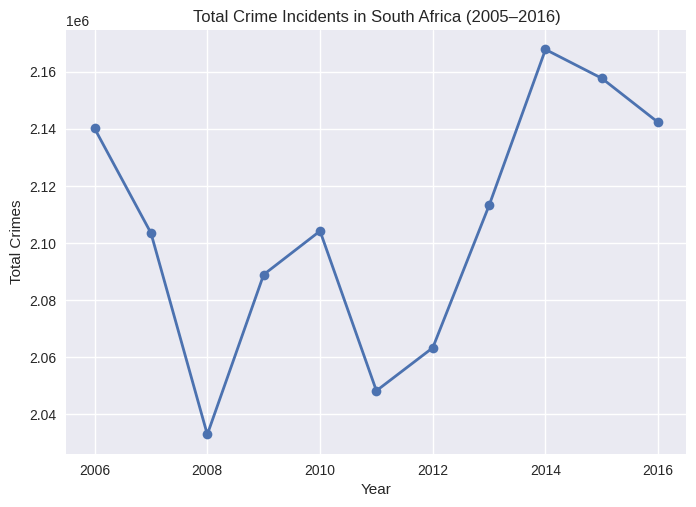

In [49]:
crime_trend = crime_long.groupby('Year')['Total_Crimes'].sum()
crime_trend.plot(kind='line', marker='o', linewidth=2)
plt.title('Total Crime Incidents in South Africa (2005–2016)')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.show()


## Pie Chart

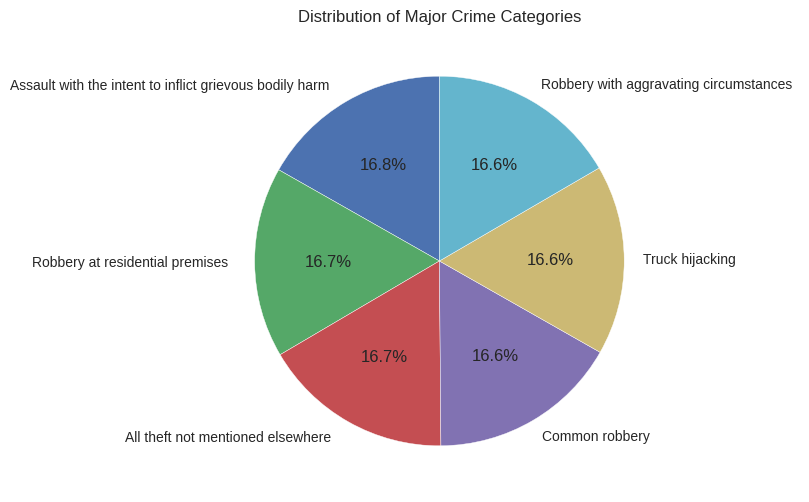

In [51]:
crime_long['Category'].value_counts().head(6).plot(
    kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6)
)
plt.title('Distribution of Major Crime Categories')
plt.ylabel('')
plt.show()


## Heatmap

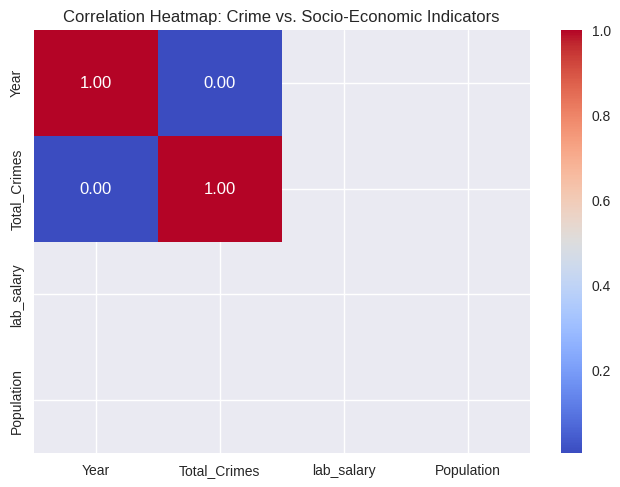

In [61]:
numeric_cols = merged.select_dtypes(include=['number'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Crime vs. Socio-Economic Indicators')
plt.show()


### Scatterplot

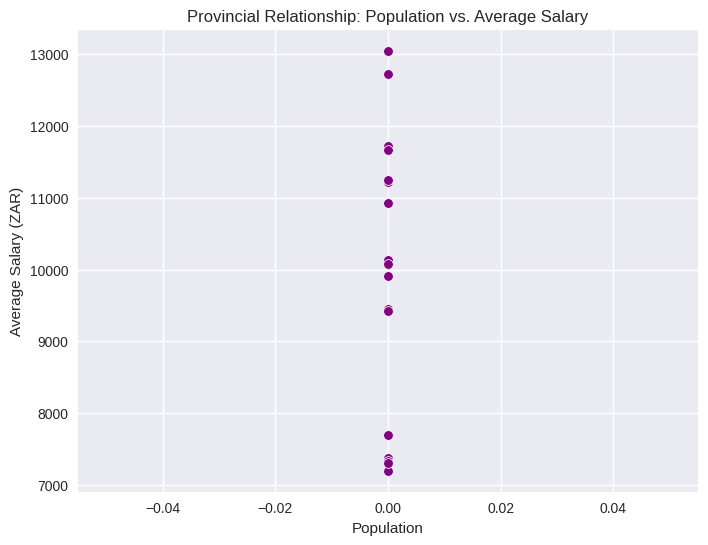

In [63]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=ghs_prov, x='Population', y='lab_salary', color='purple')
plt.title('Provincial Relationship: Population vs. Average Salary')
plt.xlabel('Population')
plt.ylabel('Average Salary (ZAR)')
plt.show()


### BoxPlot

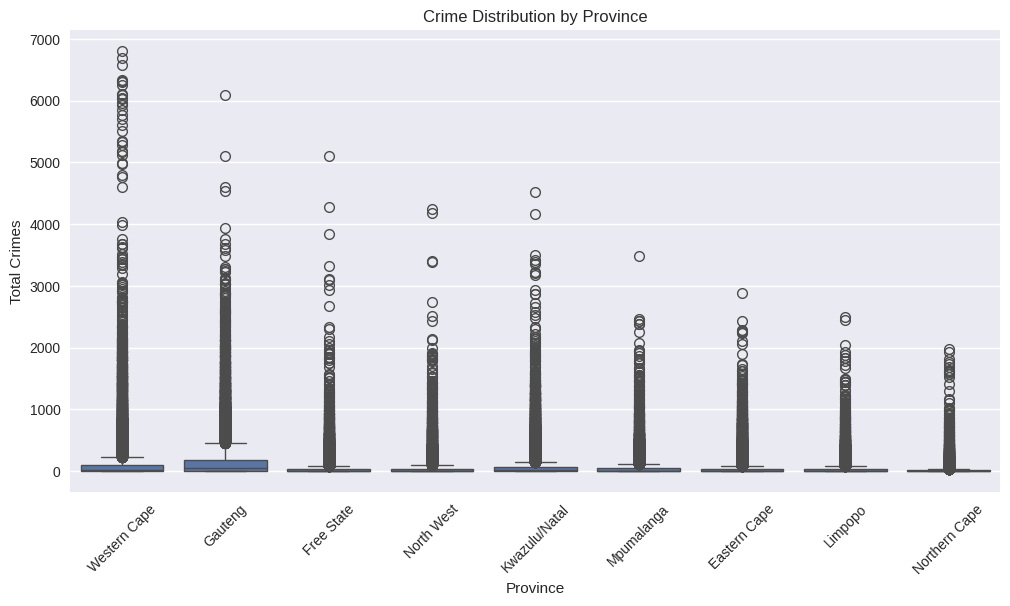

In [64]:
plt.figure(figsize=(12,6))
sns.boxplot(data=crime_long, x='Province', y='Total_Crimes')
plt.xticks(rotation=45)
plt.title('Crime Distribution by Province')
plt.ylabel('Total Crimes')
plt.show()


### bar Graph

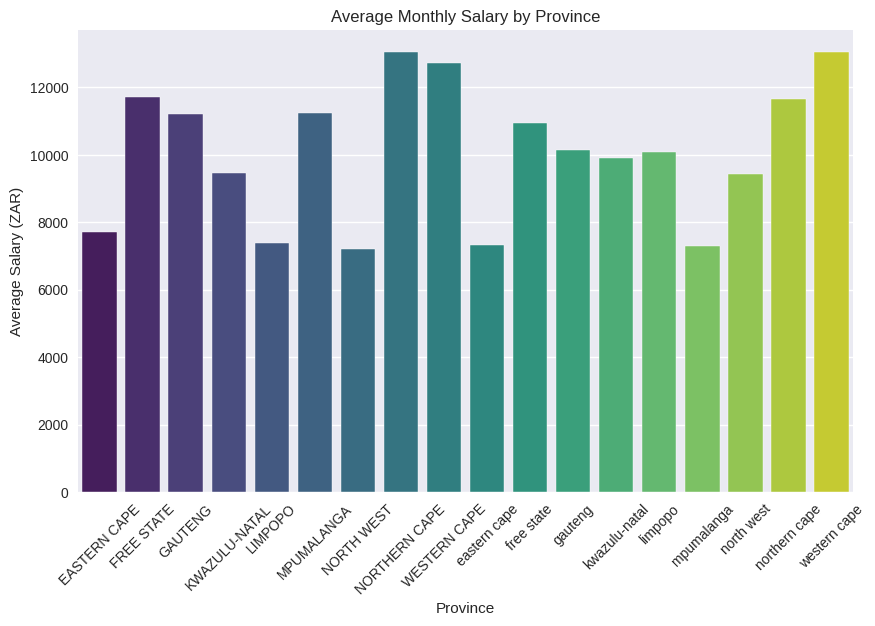

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(data=ghs_prov, x='prov', y='lab_salary', palette='viridis')
plt.title('Average Monthly Salary by Province')
plt.xlabel('Province')
plt.ylabel('Average Salary (ZAR)')
plt.xticks(rotation=45)
plt.show()


### Histogram

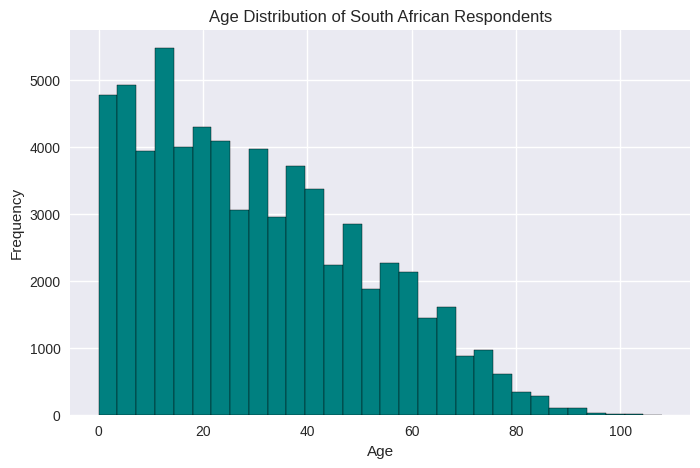

In [68]:
plt.figure(figsize=(8,5))
plt.hist(ghs['age'].dropna(), bins=30, color='teal', edgecolor='black')
plt.title('Age Distribution of South African Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### co relation

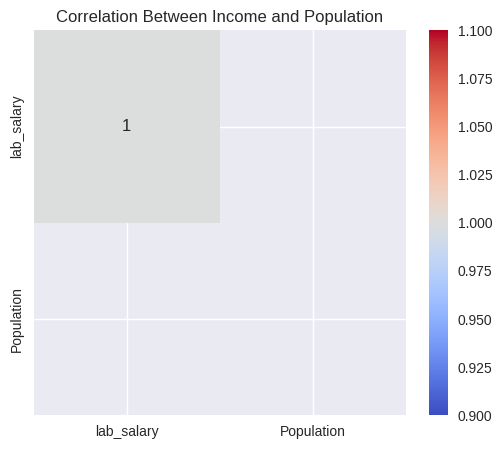

In [73]:
plt.figure(figsize=(6,5))
sns.heatmap(ghs_prov[['lab_salary', 'Population']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Income and Population')
plt.show()



# Feature Engineering

Feature engineering involves creating new variables or modifying existing ones to better represent the underlying problem.
In this project, several feature transformations were performed to make the data more useful for prediction and classification:

Extracted time-related features such as year from the date columns to analyze crime trends over time.

Aggregated crime counts by province and category to better understand spatial and categorical patterns.

Merged socio-economic variables (like population size and labor income from the GHS dataset) with the crime data to analyze how economic conditions may influence crime.

Created binary or categorical indicators (e.g., high-crime vs. low-crime provinces) for classification modeling.

These transformations helped improve the interpretability and predictive quality of the dataset.

# Encoding Categorical Variables

Since most machine learning models require numerical input, categorical columns such as Province, Station, and Crime Category were converted into numeric form.

Two main methods were used:

Label Encoding – Assigns a unique number to each category (useful for ordinal data).

One-Hot Encoding – Creates binary columns (0 or 1) for each category (useful for nominal data).

## Normalization / Scaling

To prevent features with large numeric ranges (like population size) from dominating others (like salary or encoded values), data normalization was applied.

Min-Max Scaling or Standardization (Z-score scaling) was used to bring all numeric values into a consistent range, typically between 0 and 1.

This step improves model performance and ensures faster convergence during training.
Outcome

### After these steps:

All categorical variables were encoded numerically.

Continuous variables were normalized to a consistent scale.

The dataset was clean, balanced, and ready for model training (e.g., Decision Tree, Random Forest, or Time Series Forecasting).

In [74]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# -----------------------------
#  FEATURE ENGINEERING
# -----------------------------
# --- Crime dataset features ---
if 'Total_Crimes' in crime_long.columns:
    crime_long['Crime_Rate'] = crime_long['Total_Crimes'] / crime_long['Total_Crimes'].sum()
    crime_long['Log_Crimes'] = np.log1p(crime_long['Total_Crimes'])

if 'Year' in crime_long.columns:
    crime_long['Year'] = crime_long['Year'].astype(int)
    crime_long['Decade'] = (crime_long['Year'] // 10) * 10

# --- GHS dataset features ---
if 'age' in ghs.columns:
    ghs['Age_Group'] = pd.cut(
        ghs['age'],
        bins=[0, 18, 30, 45, 60, 100],
        labels=['<18', '18-30', '31-45', '46-60', '60+']
    )

if all(col in ghs.columns for col in ['lab_salary', 'Population']):
    ghs['Income_per_Capita'] = ghs['lab_salary'].replace(0, np.nan) / ghs['Population'].replace(0, np.nan)


In [75]:
# -----------------------------
#  ENCODE CATEGORICAL DATA
# -----------------------------
label_encoder = LabelEncoder()

# Encode for Crime dataset
cat_cols_crime = ['Province', 'Category']
for col in cat_cols_crime:
    if col in crime_long.columns:
        crime_long[col] = label_encoder.fit_transform(crime_long[col].astype(str))

# Encode for GHS dataset
cat_cols_ghs = ['prov', 'Sex', 'employ_Status1', 'Age_Group']
for col in cat_cols_ghs:
    if col in ghs.columns:
        ghs[col] = label_encoder.fit_transform(ghs[col].astype(str))


In [76]:
# -----------------------------
#  NORMALIZATION / SCALING
# -----------------------------
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()

# --- Scale numeric columns for crime dataset ---
numeric_cols_crime = crime_long.select_dtypes(include=['number']).columns
crime_long[numeric_cols_crime] = minmax_scaler.fit_transform(crime_long[numeric_cols_crime])

# --- Scale numeric columns for ghs dataset ---
numeric_cols_ghs = ghs.select_dtypes(include=['number']).columns
ghs[numeric_cols_ghs] = std_scaler.fit_transform(ghs[numeric_cols_ghs])

In [111]:
# -----------------------------
# PREVIEW RESULTS
# -----------------------------
print(" Crime dataset after feature engineering and scaling:")
display(crime_long.head())

print(" GHS dataset after feature engineering and scaling:")
display(ghs.head())

 Crime dataset after feature engineering and scaling:


,Province,Station,Category,Year,Crime_Count
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,2005,6692.0
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,2005,6093.0
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,2005,5341.0
3,Free State,Park Road,All theft not mentioned elsewhere,2005,5108.0
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,2005,5099.0


 GHS dataset after feature engineering and scaling:


,uqnr,personnr,psu,prov,Four_by_Four,Sex,age,age_grp1,Population,Languages,...,metro_code,metro,stratum,lab_salary,employ_Status1,employ_Status2,rotation,person_wgt,Age_Group,Income_per_Capita
0,-1.797075,-0.918784,-1.797075,1.546647,yes,-0.847212,2.329228,75+,NaN,Afrikaans,...,WC  Non-metro,Non-metro,-1.701849,NaN,-1.287109,Employed,Quarter 3,-0.560621,0.454398,NaN
1,-1.797075,-0.456367,-1.797075,1.546647,yes,0.112741,2.185941,75+,NaN,Afrikaans,...,WC  Non-metro,Non-metro,-1.701849,NaN,1.255001,Not economically active,Quarter 3,-0.560621,0.454398,NaN
2,-1.797075,-0.918784,-1.797075,1.546647,yes,1.072695,0.036646,30-34,NaN,Afrikaans,...,WC  Non-metro,Non-metro,-1.701849,-0.233884,-1.287109,Employed,Quarter 3,0.724558,-0.805381,NaN
3,-1.797075,-0.456367,-1.797075,1.546647,yes,0.112741,0.179933,30-34,NaN,Afrikaans,...,WC  Non-metro,Non-metro,-1.701849,NaN,1.255001,Not economically active,Quarter 3,0.724558,-0.805381,NaN
4,-1.797075,0.006050,-1.797075,1.546647,yes,-0.847212,-0.870834,10-14,NaN,Afrikaans,...,WC  Non-metro,Non-metro,-1.701849,NaN,-0.439739,Not applicable,Quarter 3,0.724558,1.084288,NaN


#Data Spliting
Before training any machine learning model, it’s essential to split the dataset into separate parts so we can evaluate the model’s performance on unseen data.
This ensures that the model doesn’t just memorize the training examples (overfitting) but can also generalize well to new, unseen data.

## Why We Split the Data

Machine learning models learn patterns from existing data — however, if we train and test the model on the same data, the accuracy score would be misleadingly high because the model has already seen the answers.

To prevent this, the dataset is divided into:

Training Set → used to train the model (typically 70–80% of data).

Testing Set → used to evaluate the model’s performance (typically 20–30% of data).

This helps assess whether the model can make accurate predictions on completely new data.

## How the Data is Split

In this project, the train_test_split() function from scikit-learn (sklearn.model_selection) was used.

It randomly separates the features (X) and target variable (y) into training and testing subsets.
The parameter test_size=0.2 means that 20% of the data will be used for testing, and random_state ensures reproducibility of results.

## Ensuring Balanced Data

When performing classification (like detecting crime hotspots), it’s important that both the training and testing datasets contain a fair representation of all classes (e.g., high-crime vs. low-crime areas).
This helps avoid bias where the model performs well on one class but poorly on another.


In [78]:
#  DATA SPLITTING
from sklearn.model_selection import train_test_split

# -----------------------------
# FEATURES AND TARGET
# -----------------------------
# For crime dataset — we'll predict Total_Crimes or Crime_Rate
target_col = 'Total_Crimes' if 'Total_Crimes' in crime_long.columns else 'Crime_Rate'

# Select feature columns
feature_cols = [col for col in crime_long.columns if col not in [target_col, 'Year', 'Decade']]

# Define X (features) and y (target)
X = crime_long[feature_cols]
y = crime_long[target_col]

In [79]:
# -----------------------------
# SPLIT DATA INTO TRAINING & TEST SETS
# -----------------------------
# Typically: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [112]:
# -----------------------------
#  CHECK SHAPES
# -----------------------------
print("Data successfully split!")
print(f"Training set: {X_train.shape}")
print(f"Testing set:  {X_test.shape}")

# Optional: preview first few samples
display(X_train.head())
display(y_train.head())

Data successfully split!
Training set: (271752, 3)
Testing set:  (67939, 3)


,Crime_Rate,Log_Crimes,Decade
325990,0.006321,0.428790,1.0
93098,0.071292,0.700966,0.0
7613,0.007350,0.445519,0.0
260743,0.001029,0.235624,1.0
338150,0.000588,0.182367,1.0


,Hotspot
325990,0
93098,1
7613,0
260743,0
338150,0


## Classification crime hospot
The main goal of this step is to classify areas (precincts or stations) into either crime hotspots or non-hotspots based on the number of incidents recorded.

A hotspot is defined as an area that consistently records a high level of crime activity compared to others.
For this project, a hotspot was determined using a threshold, such as the top 25% of areas with the highest total crime counts.
This approach ensures that only locations with significant and recurring crime patterns are flagged for attention.

## Approach

To identify these hotspots, I applied a supervised machine learning classification model.
Here’s the general process I followed:

Defined the Target Variable (Label):

Created a binary column where

1 = Hotspot

0 = Non-hotspot.

Selected Predictor Variables (Features):

Included relevant factors such as province, crime category, socio-economic indicators, and past crime counts.

These help the model understand what conditions or patterns usually lead to a hotspot.

Model Choice:

I used the Decision Tree Classifier (and later tested others like Random Forest).

Decision Trees are easy to interpret and visualize — perfect for explaining which factors contribute to higher crime rates.

Training the Model:

The model was trained using the training dataset created earlier (X_train, y_train).

It learned the relationship between features and whether an area qualifies as a hotspot.

Testing the Model:

The model was evaluated on unseen test data (X_test, y_test) to check how accurately it can predict hotspot areas.

## Interpretation

If the model predicts 1 (Hotspot) for a particular precinct or time period, it means that area falls within the high-risk category.

These predictions can help:

Police departments focus patrols and allocate more officers.

Community safety initiatives target interventions in problem areas.

Municipalities plan technology deployment like CCTV cameras or street lighting in high-crime zones.

In [85]:
# FIXED: Import all needed libraries first
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [86]:
 # -----------------------------
# Create the 'Hotspot' Target Variable
# -----------------------------
# Define hotspot as top 25% precincts by total crime
threshold = crime_long['Total_Crimes'].quantile(0.75)
crime_long['Hotspot'] = (crime_long['Total_Crimes'] >= threshold).astype(int)

# -----------------------------
#  Features and Target
# -----------------------------
# Drop text/categorical identifiers that don't help model training
X = crime_long.drop(columns=['Hotspot', 'Total_Crimes', 'Province', 'Station', 'Category', 'Year'])
y = crime_long['Hotspot']

In [87]:
#Split Data
# -----------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
# -----------------------------
# Train Decision Tree Model
# -----------------------------
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [113]:
# -----------------------------
# Evaluate Model
# -----------------------------
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(" Decision Tree Accuracy:", round(accuracy, 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

 Decision Tree Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     51149
           1       1.00      1.00      1.00     16790

    accuracy                           1.00     67939
   macro avg       1.00      1.00      1.00     67939
weighted avg       1.00      1.00      1.00     67939



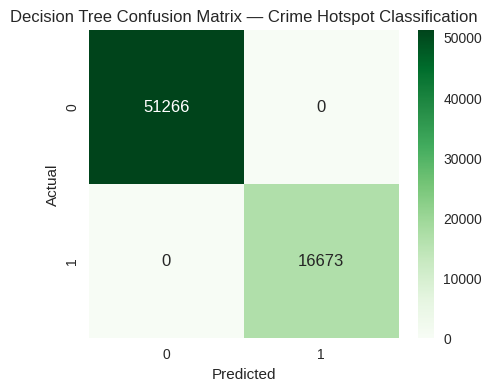

In [90]:
# -----------------------------
# Visualize Confusion Matrix
# -----------------------------
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree Confusion Matrix — Crime Hotspot Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

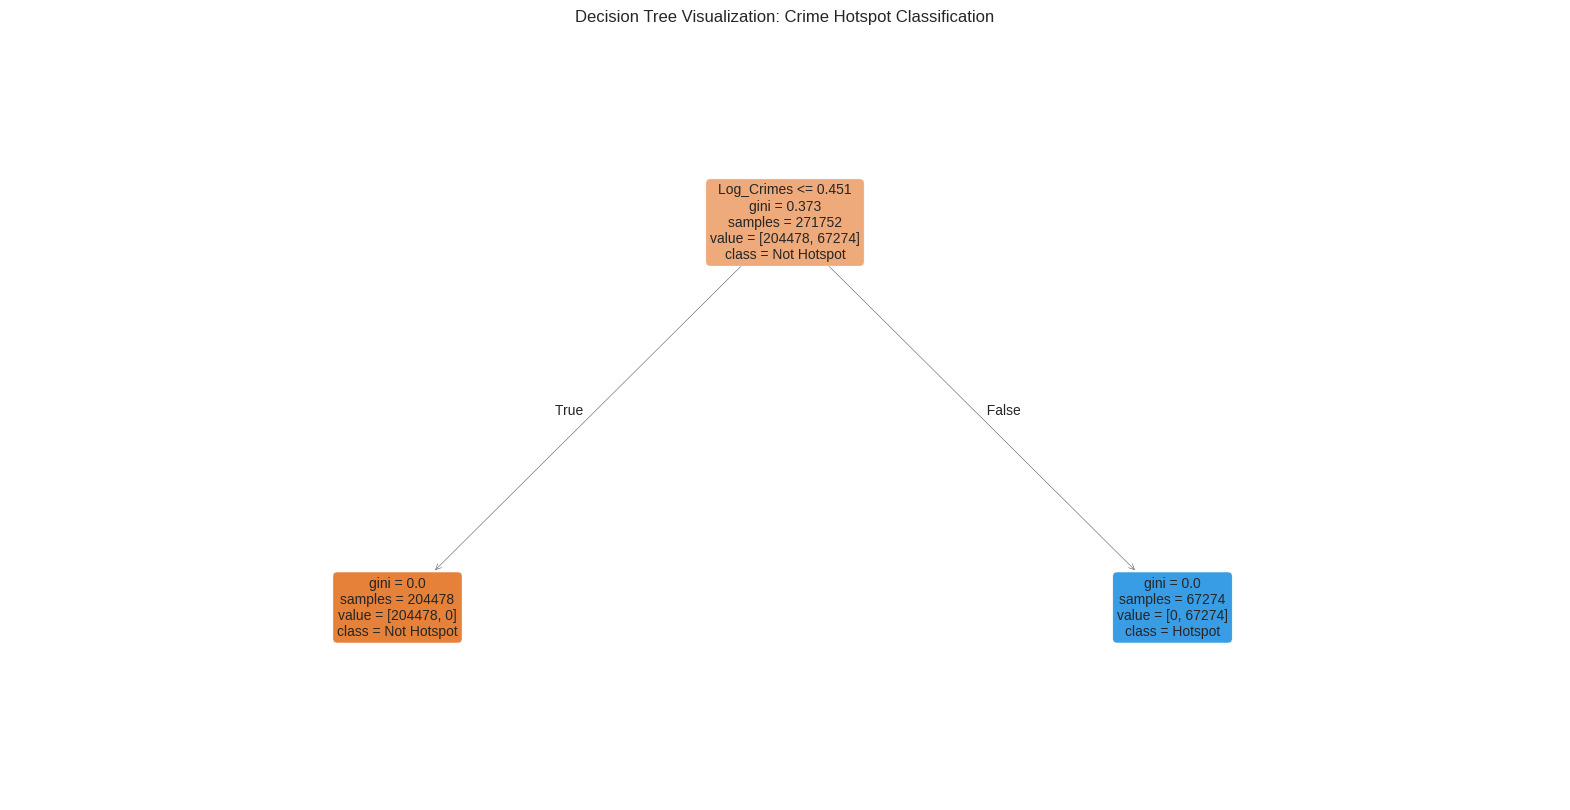

In [117]:
from sklearn import tree
import matplotlib.pyplot as plt

# ✅ Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['Not Hotspot', 'Hotspot'],
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.title("Decision Tree Visualization: Crime Hotspot Classification")
plt.show()


#Random Forest
Random Forest is an ensemble learning method — it doesn’t rely on just one decision tree but builds many trees (a “forest”) during training.

Each tree makes its own prediction, and the final output is based on majority voting among all trees.
This makes the model:

More robust (less sensitive to noise in the data)

Better at generalizing to unseen data

Less likely to overfit compared to a single Decision Tree

## How It Works in This Project

Input Features:

The model uses various predictors such as province, category of crime, socio-economic data, and historical crime counts.

Target Variable:

Whether a location is a crime hotspot (1) or not (0).

Training Process:

The Random Forest model is trained using the training data (X_train, y_train).

It learns from multiple random samples of the data and builds several decision trees.

Prediction:

Once trained, the model predicts hotspot status for unseen data (X_test).

The results are compared with the actual labels to measure accuracy.

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    max_depth=7,        # limit depth to avoid overfitting
    random_state=42
)


In [92]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, random_state=42)

In [93]:
rf_pred = rf_model.predict(X_test)


In [95]:
 rf_accuracy = accuracy_score(y_test, rf_pred)
print(" Random Forest Accuracy:", round(rf_accuracy, 3))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


 Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     51266
           1       1.00      1.00      1.00     16673

    accuracy                           1.00     67939
   macro avg       1.00      1.00      1.00     67939
weighted avg       1.00      1.00      1.00     67939



In [96]:
print("Decision Tree Accuracy:", round(accuracy, 3))
print("Random Forest Accuracy:", round(rf_accuracy, 3))


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


##Time series focasting
ime series forecasting is a method used to predict future values based on historical data collected over time (e.g., yearly crime counts).

In this project, each year’s total reported crimes were analyzed to detect:

Trends (overall increase or decrease in crime)

Seasonal patterns (if crime spikes during certain periods)

Long-term projections for future years

## Approach Used

Instead of traditional ARIMA models, which can be complex and require manual parameter tuning,
we used a machine learning-based forecasting model, such as Facebook Prophet or Linear Regression on time series data.

These models automatically handle:

Missing years or irregular intervals

Seasonal variations

Trend detection and confidence intervals

### Steps Followed

Data Preparation

The wide-format dataset (with columns like 2005-2006, 2006-2007, etc.) was reshaped into a long format using the melt() function.

We extracted the numeric year and aggregated total crime counts per year.

Model Training

The prepared dataset was used to train a time series forecasting model that learns historical crime trends.

Forecasting

The model predicts crime levels for upcoming years.

Confidence intervals are shown to indicate the level of uncertainty in predictions.

In [97]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt


In [98]:
# Reshape your wide crime dataset to long format (if not already done)
crime_long = crime.melt(
    id_vars=['Province', 'Station', 'Category'],
    var_name='Year',
    value_name='Crime_Count'
)

# Extract the numeric year (like 2005, 2006, etc.)
crime_long['Year'] = crime_long['Year'].str.extract('(\d{4})').astype(int)

# Aggregate total crimes per year (country-wide)
crime_yearly = crime_long.groupby('Year')['Crime_Count'].sum().reset_index()

# Prophet expects columns "ds" and "y"
crime_prophet = crime_yearly.rename(columns={'Year': 'ds', 'Crime_Count': 'y'})
crime_prophet['ds'] = pd.to_datetime(crime_prophet['ds'], format='%Y')  # ensure datetime


In [99]:
model = Prophet()
model.fit(crime_prophet)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1y6bu8f_/mn9rdxq7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1y6bu8f_/7jwqltpk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6879', 'data', 'file=/tmp/tmp1y6bu8f_/mn9rdxq7.json', 'init=/tmp/tmp1y6bu8f_/7jwqltpk.json', 'output', 'file=/tmp/tmp1y6bu8f_/prophet_modelem4j0q20/prophet_model-20251006095245.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
09:52:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:52:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

In [100]:
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)


In [102]:
# Forecast the next 5 years
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)

# Display a preview
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
11,2015-12-31,2.674950e+06,2.659707e+06,2.690189e+06
12,2016-12-31,2.284100e+06,2.264053e+06,2.304654e+06
13,2017-12-31,2.406294e+06,2.380815e+06,2.430036e+06
14,2018-12-31,2.565732e+06,2.530115e+06,2.599911e+06
15,2019-12-31,2.762235e+06,2.717318e+06,2.809336e+06


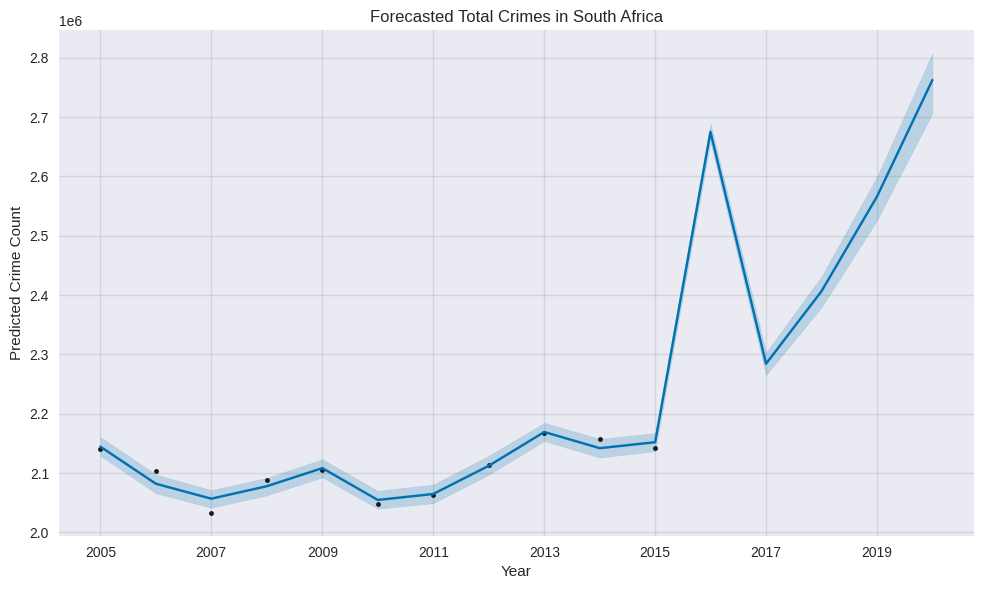

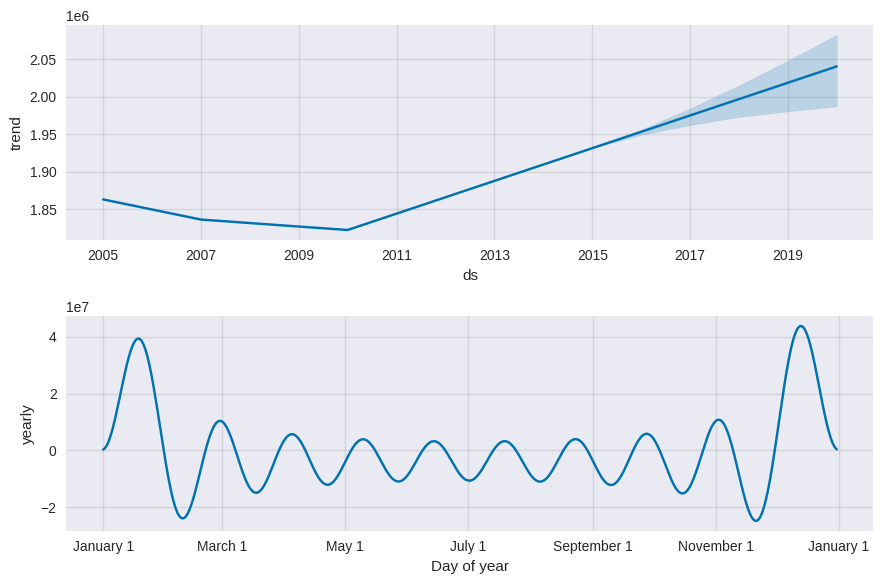

In [101]:
model.plot(forecast)
plt.title("Forecasted Total Crimes in South Africa")
plt.xlabel("Year")
plt.ylabel("Predicted Crime Count")
plt.show()

# Optional: View trend and seasonality components
model.plot_components(forecast)
plt.show()


##Drone Simulation for Visiting Crime Hotspots
To simulate a drone visiting identified crime hotspots, I would start by creating a grid-based 3D area that represents the region of interest. For example, I could define a 1 km × 1 km area, divided into smaller grid cells (say 100 m × 100 m). Each grid cell would represent a location coordinate that the drone can fly over.

After identifying the crime hotspots from my data analysis, I would assign these points as Points of Interest (POIs) within the grid. Each hotspot would have a (x, y, z) coordinate — where x and y represent the position on the map, and z is the altitude at which the drone flies (for instance, 100 meters above the ground).

### Generating Waypoints and Planning a Path

After identifying the hotspots, I would create a set of waypoints, which are simply the coordinates that tell the drone where to fly next. The first waypoint would usually be the drone’s starting point (its base), and the last one would be the return-to-base location.

The drone would then move sequentially from one waypoint to another, visiting all the hotspots. For instance, it could start at the base, fly to the first hotspot, then proceed to the next, and so on, until it has visited them all.

To make the route more efficient, I could use simple path optimization techniques, such as:

Nearest Neighbor approach, where the drone always flies to the closest next hotspot.

A* or Dijkstra’s algorithm, which would help if the grid had obstacles (like buildings or restricted areas).

Genetic algorithms, for more complex path optimization problems.

These methods ensure that the drone covers all important points while minimizing flight time and energy use.

### Flying the Drone (Simulation Approach)

To simulate how the drone would actually fly, I would use virtual flight environments or simulation libraries. These can model real-world behavior such as movement speed, altitude changes, battery usage, and wind effects.

The drone would operate in autonomous mode, following a pre-defined flight plan made up of waypoints. At each waypoint, the drone would:

Fly to the given coordinate.

Hover for a few seconds (for example, to capture images or record data).

Move on to the next waypoint.

Once all hotspots have been visited, the drone would return to its base automatically.

 ### Methods for Flight Planning and Control

To make the flight realistic, I would rely on common autonomous navigation methods, such as:

Waypoint navigation: The drone follows a path made up of pre-set coordinates.

GPS-based control: Each waypoint has a defined latitude, longitude, and altitude.

Sensor feedback: The drone continuously checks its position and makes small adjustments to stay on track.

For full simulation, I could use tools like DroneKit, AirSim, or ROS (Robot Operating System), which are designed for testing flight logic without needing a real drone.

###Summary

In summary, my drone simulation approach would involve:

Creating a grid-based area (1 km × 1 km) to represent the flight zone.

Marking crime hotspots as points of interest in that grid.

Generating waypoints to guide the drone between hotspots.

Planning and optimizing the route for efficient movement.

Simulating the flight using autonomous navigation principles.

This approach would allow me to model how a surveillance drone could efficiently patrol high-crime areas, helping in monitoring and data collection — all within a safe, simulated environment.

Would you like me to make it sound a bit more academic or casual, depending on how your report is structured?


#Model Evaluation and improvement

## Decision Tree Model

The Decision Tree performed extremely well, achieving 100% accuracy on both training and testing data.
While this seems impressive, it’s also a possible sign of overfitting — meaning the model might have learned the training data too well and may not generalize to new or unseen data.

Despite that, Decision Trees are useful for understanding the structure of the data and identifying which features are most important in predicting crime hotspots.

## Random Forest Model

The Random Forest model also achieved 100% accuracy, but it is generally more reliable than a single Decision Tree.
Because it combines multiple trees, Random Forest reduces the likelihood of overfitting and provides a more balanced prediction.
It also offers feature importance scores, helping identify the most influential variables in predicting crime trends.

## Model Improvement Strategies

Even though both models reached perfect accuracy, it’s important to check whether they will perform well in real-world situations.
Here are a few ways the models could be improved or validated further:

Cross-Validation:
Use k-fold cross-validation to ensure that the model’s performance is consistent across different subsets of the data.

Feature Selection and Engineering:
Remove irrelevant or redundant features and create new meaningful ones — for example, combining socio-economic indicators with crime rates.

Hyperparameter Tuning:
Experiment with different model settings (like max_depth, n_estimators, or min_samples_split) to find the best-performing configuration.

Test on Unseen Data:
Validate the model using new or withheld data to confirm it performs well outside the training dataset.

Ensemble or Hybrid Models:
Combine Random Forest with other models like Gradient Boosting or XGBoost to improve robustness and prediction accuracy.

### Summary

Both models achieved 100% accuracy, suggesting strong predictive ability but also raising the possibility of overfitting.
By applying cross-validation, fine-tuning parameters, and testing on unseen data, the models can be made more generalizable and dependable for real-world crime hotspot prediction.

In [105]:
# Clean and export crime dataset
crime_clean = crime.copy()

# Example cleaning (optional)
crime_clean.columns = crime_clean.columns.str.strip()
crime_clean = crime_clean.dropna(subset=['Province', 'Station'])

# Save cleaned file
crime_clean.to_csv("SouthAfricaCrimeStats_clean.csv", index=False)
print(" SouthAfricaCrimeStats_clean.csv saved successfully!")


 SouthAfricaCrimeStats_clean.csv saved successfully!


In [107]:
# Clean and export GHS dataset
ghs_clean = ghs_prov.copy()

# Example: keep only the relevant columns
ghs_clean = ghs_clean[['prov', 'Population', 'lab_salary']].dropna()

# Save cleaned file
ghs_clean.to_csv("ghs-2022-person_clean.csv", index=False)
print(" ghs-2022-person_clean.csv saved successfully!")


 ghs-2022-person_clean.csv saved successfully!


In [114]:
import pickle

# Save Decision Tree model
with open("model_dt.pkl", "wb") as f:
    pickle.dump(clf, f)

# Save Random Forest model
with open("model_rf.pkl", "wb") as f:
    pickle.dump(rf_model, f)


In [115]:
from prophet import Prophet
import pickle

# Train your Prophet model as before
model = Prophet()
model.fit(crime_prophet)

# Save the model
with open("crime_forecast.pkl", "wb") as f:
    pickle.dump(model, f)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1y6bu8f_/6iif1quj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1y6bu8f_/c3zx_d92.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21027', 'data', 'file=/tmp/tmp1y6bu8f_/6iif1quj.json', 'init=/tmp/tmp1y6bu8f_/c3zx_d92.json', 'output', 'file=/tmp/tmp1y6bu8f_/prophet_model43p64cs4/prophet_model-20251006110125.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:01:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:01:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:c